In [1]:
# This is a testing script for my exchange server
import requests
import threading
import random
import time
import matplotlib.pyplot as plt
import json

In [2]:
# Global Variables
%matplotlib notebook
URL = "http://localhost:8080/api/order"
URL_price = "http://localhost:8080/api/1/data/marketPrice"
assetID = 1
URL_snapshot = 'http://localhost:8080/api/' + str(assetID) + '/data/LOBSnapshot'

symbols = ['DOUG', 'TRAV', '24k', 'ART']
# qty will be within a range
types = ['market', 'limit']
sides = ['buy', 'sell']
#limit will be a range
#fig.show()
#fig.canvas.draw()

In [27]:
# Function Definitions

# Makes x random order requests
def XRandomOrders(x):
    for i in range(200):
        symbol = random.choice(symbols)
        qty = random.randrange(400)
        o_type = random.choice(types)
        side = random.choice(sides)
        limit = random.randrange(70)
        
        #print("Order", i, ":", side, "ing ", qty, " shares of DOUG at ", o_type)

        body = {
            'symbol': 'TRAV',
            'qty': 10,
            "type": 'market',
            "side": 'sell',
            "limit": limit,
            "time_in_force": "day"
        }

        r = requests.post(url=URL, json=body)
        #time.sleep(1)
        #r2 = requests.get(url=URL_price)
        
        #LOBsnapshot()
        
        #print(r2.json(), '\n')
        
# Collect market prices (for live price tracking)
def get_prices():
    prices = []
    for i in range(500):
        r = requests.get(url=URL_price)
        price = r.json()
        prices.append(price)
        time.sleep(0.1)
    return prices

prices = []
def PriceSnapshot():
    r = requests.get(url=URL_price)
    price = r.json()
    prices.append(price)
    ax.clear()
    ax.plot(prices)
    fig.canvas.draw()

In [28]:
# Get LOB snapshot
def LOBsnapshot():
    assetID = 1
    snap_req = requests.get(url=URL_snapshot)
    # Data is sent as 2 lists: one for bids, one for asks
    data = json.loads(snap_req.text)
    bids = data[0]
    asks = data[1]
    
   # print(data)
    # TO check Volume of Orders == Volume of Matched Limits
    totalBidVolume = 0
    x = []
    y = []
    for limit in bids:
        x.append(limit['price'])
        y.append(limit['volume'])
        totalBidVolume += limit['volume']
        
    print(totalBidVolume)
    ax.clear()
    ax.bar(x, y, color='blue')
    
    x = []
    y = []
    for limit in asks:
        x.append(limit['price'])
        y.append(limit['volume'])
    ax.bar(x, y, color='red')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


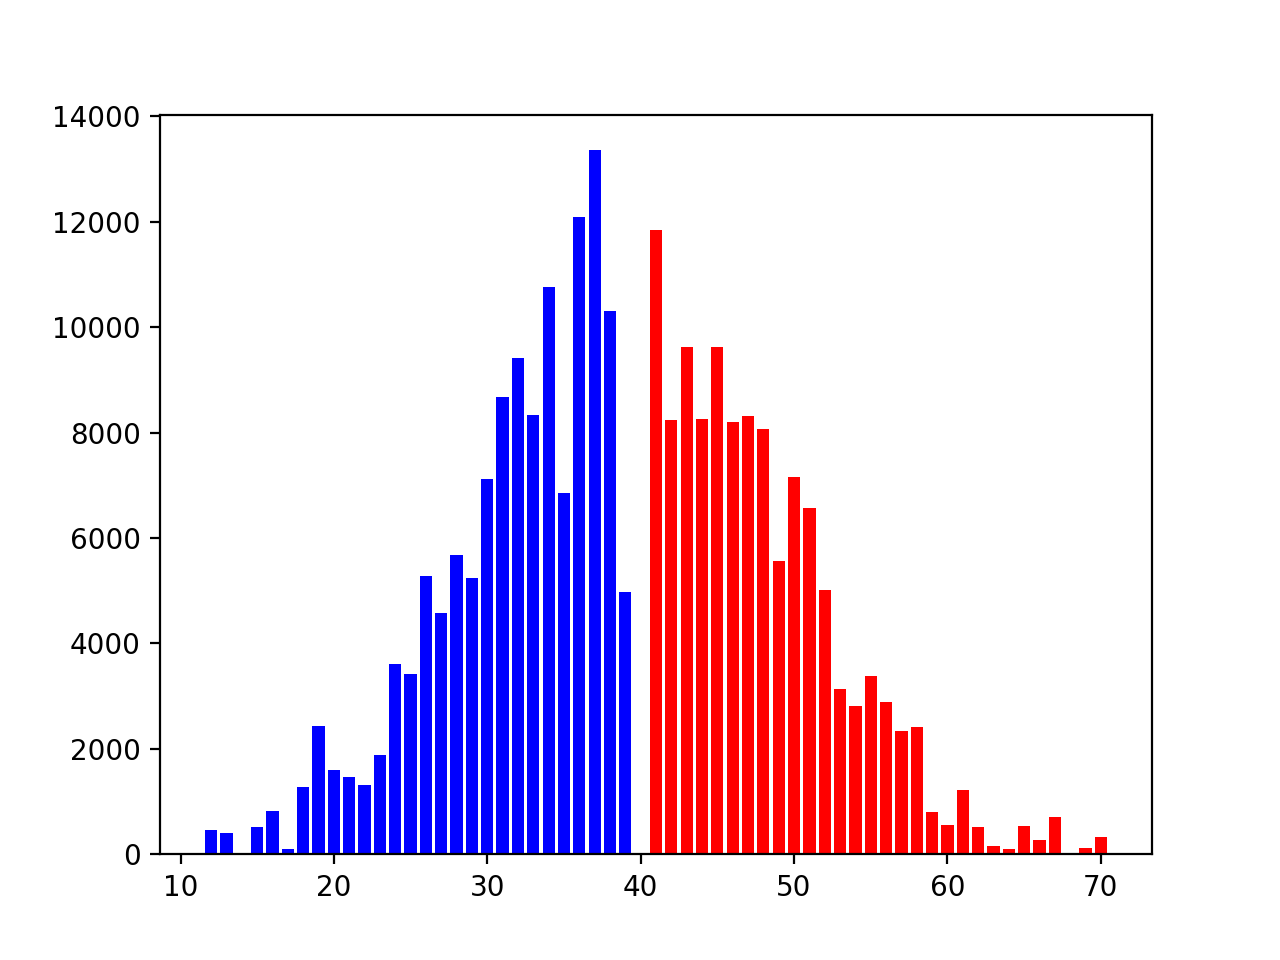

In [5]:
# Realtime Plot; Updated in LOBsnapshot()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

In [36]:
#Start 10 threads making concurrent requests
threads = []
for i in range(10):
    thread = threading.Thread(target=XRandomOrders, args=[1000])
    threads.append(thread)
    
for thread in threads:
    thread.start()

prices = []
while True:
    LOBsnapshot()
    #PriceSnapshot()
    time.sleep(0.001)
#FiftyRandomOrders()
#prices = get_prices()

151894
147954
142634
139364
134954
132274
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984
131984


ConnectionError: HTTPConnectionPool(host='localhost', port=8080): Max retries exceeded with url: /api/1/data/LOBSnapshot (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1187a4da0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [35]:

LOBsnapshot()
#initial: 151984


151984


In [31]:
prices = []
for i in range(200):
    prices.append(i ** 2)
    ax.clear()
    ax.plot(prices)
    fig.canvas.draw()
    

KeyboardInterrupt: 